In [1]:
from ultralytics import YOLO

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
model.train(data="config.yaml", epochs=20)  # train the model
metrics = model.val()  # evaluate model performance on the validation set

In [2]:
# Cargar el modelo entrenado
model = YOLO("runs/detect/train/weights/best.pt")


In [6]:
# Load the trained model
model.save("runs/detect/train/weights/best.pt")

results = model("botella.jpg")  # predict on an image
path = model.export(format="onnx")  # export the model to ONNX format


image 1/1 c:\Users\ACER\Yo\yolo100\botella.jpg: 640x640 1 plastic, 155.0ms
Speed: 7.0ms preprocess, 155.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)
Ultralytics YOLOv8.2.32  Python-3.11.9 torch-2.3.1 CPU (Intel Core(TM) i5-8300H 2.30GHz)

PyTorch: starting from 'runs\detect\train\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (11.6 MB)

ONNX: starting export with onnx 1.16.1 opset 17...
ONNX: export success  6.7s, saved as 'runs\detect\train\weights\best.onnx' (11.7 MB)

Export complete (11.3s)
Results saved to C:\Users\ACER\Yo\yolo100\runs\detect\train\weights
Predict:         yolo predict task=detect model=runs\detect\train\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs\detect\train\weights\best.onnx imgsz=640 data=config.yaml  
Visualize:       https://netron.app


In [ ]:
path = model.export(format="onnx", name="mi_modelo_entrenado20.onnx")  # export the model to ONNX format
print(f"Modelo exportado a: {path}")

In [ ]:
import json
# Evaluar el rendimiento del modelo en el conjunto de validación


metrics = model.val()

# Imprimir las métricas
print("Métricas de evaluación:")
for metric, value in metrics.items():
    print(f"{metric}: {value}")

# Guardar las métricas en un archivo JSON
with open("metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("Métricas guardadas en metrics.json")

In [4]:
metrics = model.val()

Ultralytics YOLOv8.2.32  Python-3.11.9 torch-2.3.1 CUDA:0 (NVIDIA GeForce GTX 1050, 4096MiB)


val: Scanning C:\Users\ACER\Yo\yolo\datasets\valid\labels.cache... 504 images, 0 backgrounds, 0 corrupt: 100%|██████████| 504/504 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:13<00:00,  2.38it/s]


                   all        504        505      0.534       0.68      0.673      0.622
             cardboard         84         84      0.858      0.786        0.9      0.862
                 glass         89         89       0.48      0.854      0.626      0.534
                 metal         86         86      0.553      0.791      0.693      0.669
                 paper        113        113      0.519       0.85      0.787       0.72
               plastic        103        103      0.645      0.767      0.794      0.725
                 trash         29         30      0.147     0.0333      0.235      0.219
Speed: 1.8ms preprocess, 13.5ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs\detect\val6


In [5]:
# Guardar las métricas en un archivo
with open('training_metrics.txt', 'w') as f:
    f.write(str(metrics))

In [7]:
import json

# Cargar las métricas desde el archivo JSON
with open('training_metrics.txt', 'r') as f:
    metrics = json.load(f)

train_loss = metrics['train/loss']
val_loss = metrics['val/loss']
mAP = metrics['val/mAP_0.5']

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
import json

try:
    # Evaluar el rendimiento del modelo en el conjunto de validación
    metrics = model.val()
    
    # Imprimir el tipo de datos de metrics
    print(f"Tipo de datos de 'metrics': {type(metrics)}")
    print(f"Contenido de 'metrics': {metrics}")

    if isinstance(metrics, dict):
        # Imprimir las métricas
        print("Métricas de evaluación:")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")

        # Guardar las métricas en un archivo JSON
        with open("metrics.json", "w") as f:
            json.dump(metrics, f, indent=4)

        print("Métricas guardadas en metrics.json")
    else:
        print("El método 'val()' no está retornando un diccionario válido.")
except Exception as e:
    print(f"Error al evaluar el modelo o guardar las métricas: {str(e)}")





image 1/1 c:\Users\ACER\Yo\yolo100\botellas.jpg: 448x640 1 glass, 120.0ms
Speed: 5.0ms preprocess, 120.0ms inference, 4.0ms postprocess per image at shape (1, 3, 448, 640)


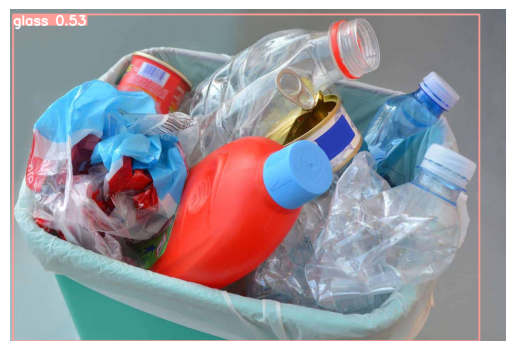

In [7]:
import matplotlib.pyplot as plt
import cv2
results = model("botellas.jpg")  # predict on an image, cambiar onmbre de la imagen
# Asegúrate de que 'results' no esté vacío y es del tipo esperado
if results and isinstance(results, list):
    for result in results:
        # Renderizar la imagen con las predicciones
        img_with_boxes = result.plot()

        # Convertir la imagen de BGR a RGB (si es necesario)
        img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)

        # Mostrar la imagen
        plt.imshow(img_with_boxes_rgb)
        plt.axis('off')  # Ocultar los ejes
        plt.show()
else:
    print("No se encontraron resultados.")

In [2]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
device

device(type='cuda')

## Con data aumentation

In [ ]:
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch

# Use the model
model.train(data="config.yaml", epochs=20)  # train the model
metrics = model.val()  # evaluate model performance on the validation set